In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


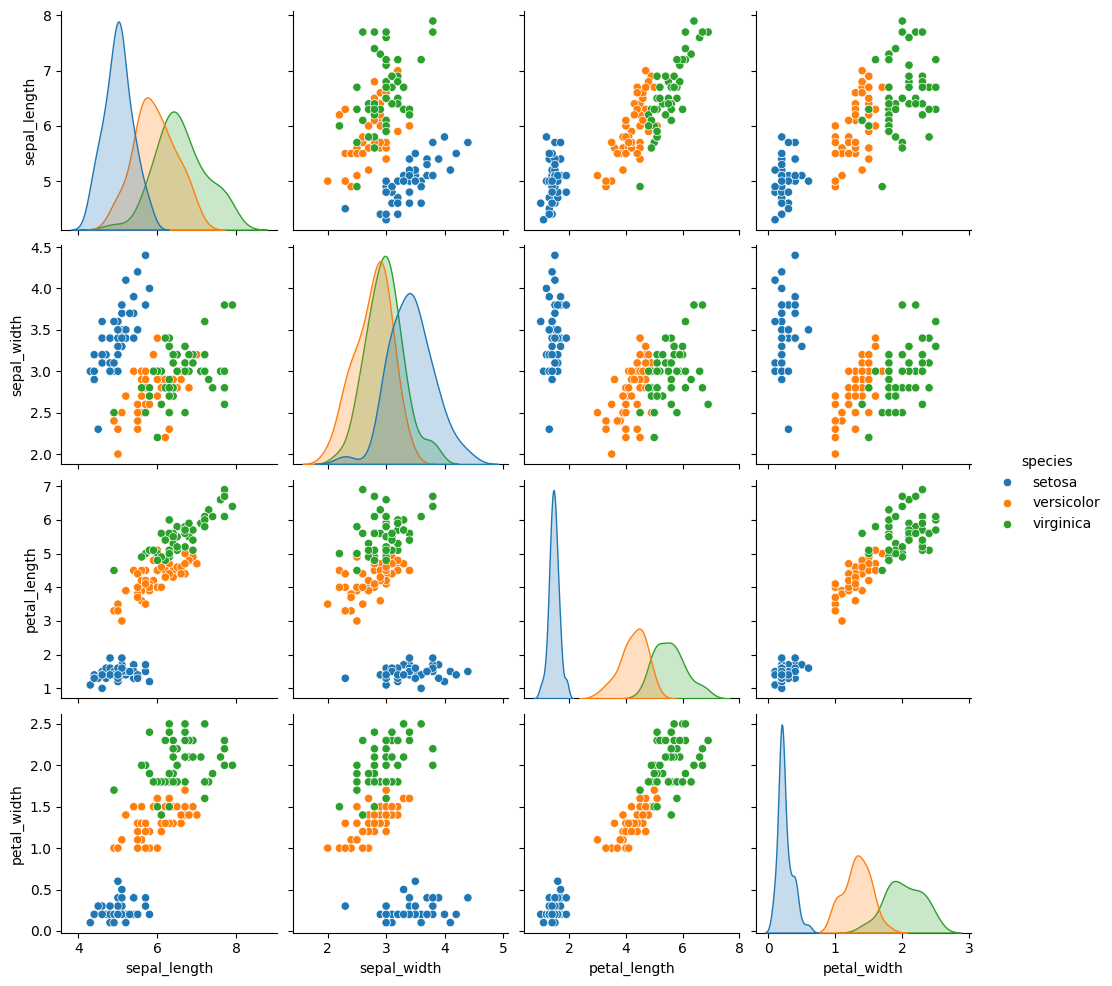

In [5]:
sns.pairplot(df, hue='species')

In [6]:
df['species_num'] = df['species']
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,setosa
134,6.1,2.6,5.6,1.4,virginica,virginica
72,6.3,2.5,4.9,1.5,versicolor,versicolor
127,6.1,3.0,4.9,1.8,virginica,virginica
119,6.0,2.2,5.0,1.5,virginica,virginica


In [7]:
df['species_num'] = df['species_num'].str.replace('setosa','1')
df['species_num'] = df['species_num'].str.replace('versicolor','2')
df['species_num'] = df['species_num'].str.replace('virginica','3')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
2,4.7,3.2,1.3,0.2,setosa,1
134,6.1,2.6,5.6,1.4,virginica,3
75,6.6,3.0,4.4,1.4,versicolor,2
67,5.8,2.7,4.1,1.0,versicolor,2
149,5.9,3.0,5.1,1.8,virginica,3


In [8]:
df['species_num'] = pd.to_numeric(df['species_num'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: >

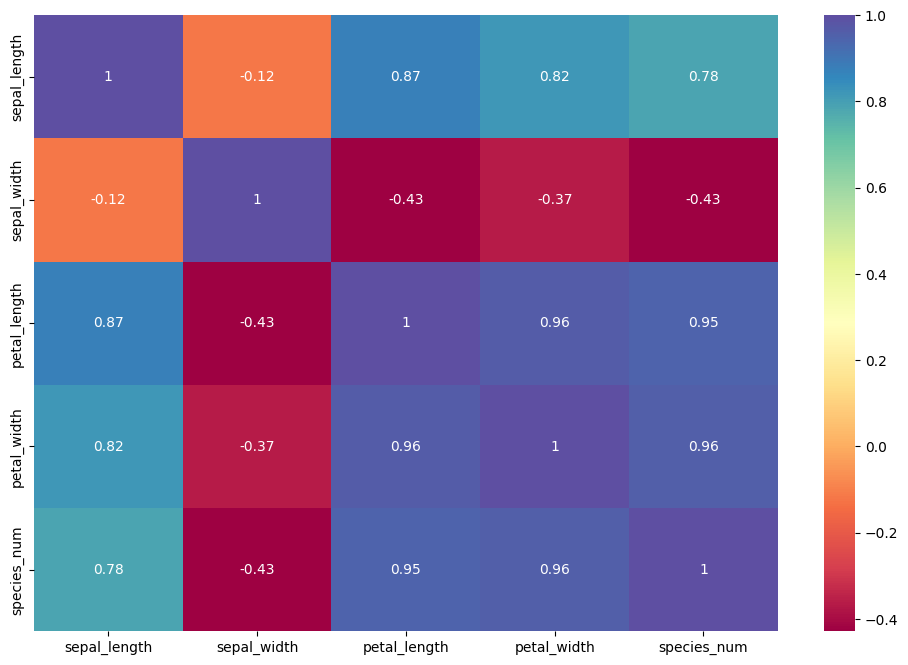

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral')

In [10]:
df1 = df.drop(['petal_length', 'species_num'], axis=1)
df1.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


In [11]:
X = df1.drop('species', axis=1)
y = df1['species']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
model = DecisionTreeClassifier()

In [15]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [18]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cvs = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
cvs.mean()

0.8916666666666664

In [21]:
cnf_mat = confusion_matrix(y_test, y_pred)
cnf_mat

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

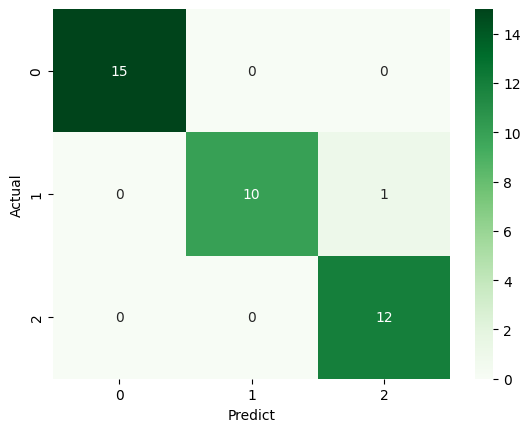

In [22]:
sns.heatmap(cnf_mat, annot=True, cmap='Greens')
plt.xlabel('Predict')
plt.ylabel('Actual')

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [24]:
 from sklearn import tree

In [25]:
features =  list(df1.columns[:-1])
target = ["setosa", "versicolor", "virinica"]
print(features)
print(target)

['sepal_length', 'sepal_width', 'petal_width']
['setosa', 'versicolor', 'virinica']


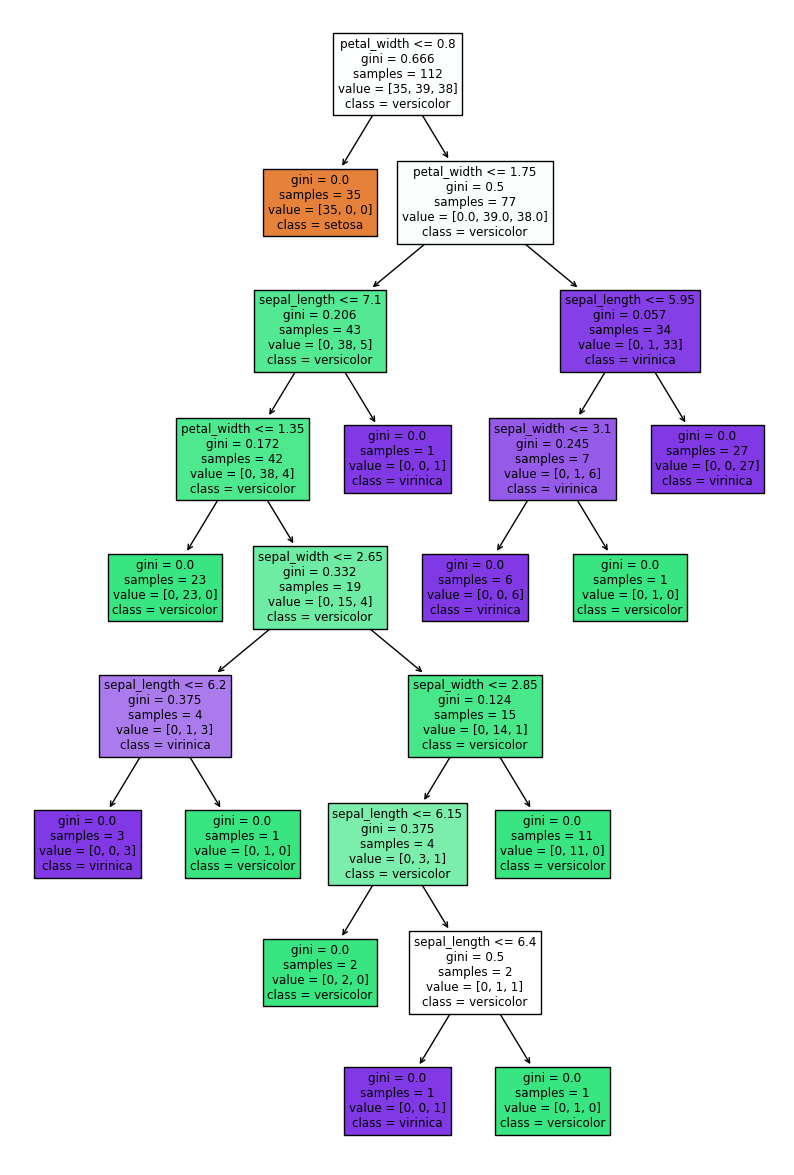

In [26]:
plt.figure(figsize=(10, 15))
tree2 = tree.plot_tree(model, filled=True, feature_names=features, class_names=target)

## Hyperparameter Optimization

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
dt_model = DecisionTreeClassifier()

In [114]:
df_params = {'criterion' : ['gini', 'enttopy'],
            'max_depth' : np.arange(2, 14, 2),
            'max_features' : ['auto', 'sqrt', 'log2']}

In [120]:
dt_cv_model = GridSearchCV(estimator = dt_model, param_grid = df_params, cv = 10)

In [121]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'enttopy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [128]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [129]:
dt_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 'sqrt')

In [159]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [160]:
y_predi = dt_tuned.predict(X_test)

In [161]:
accuracy_score(y_test, y_predi)

0.9736842105263158

In [162]:
cv_tuned = cross_val_score(estimator=dt_tuned, X=X_train, y=y_train, cv=10)
cv_tuned.mean()

0.8659090909090909

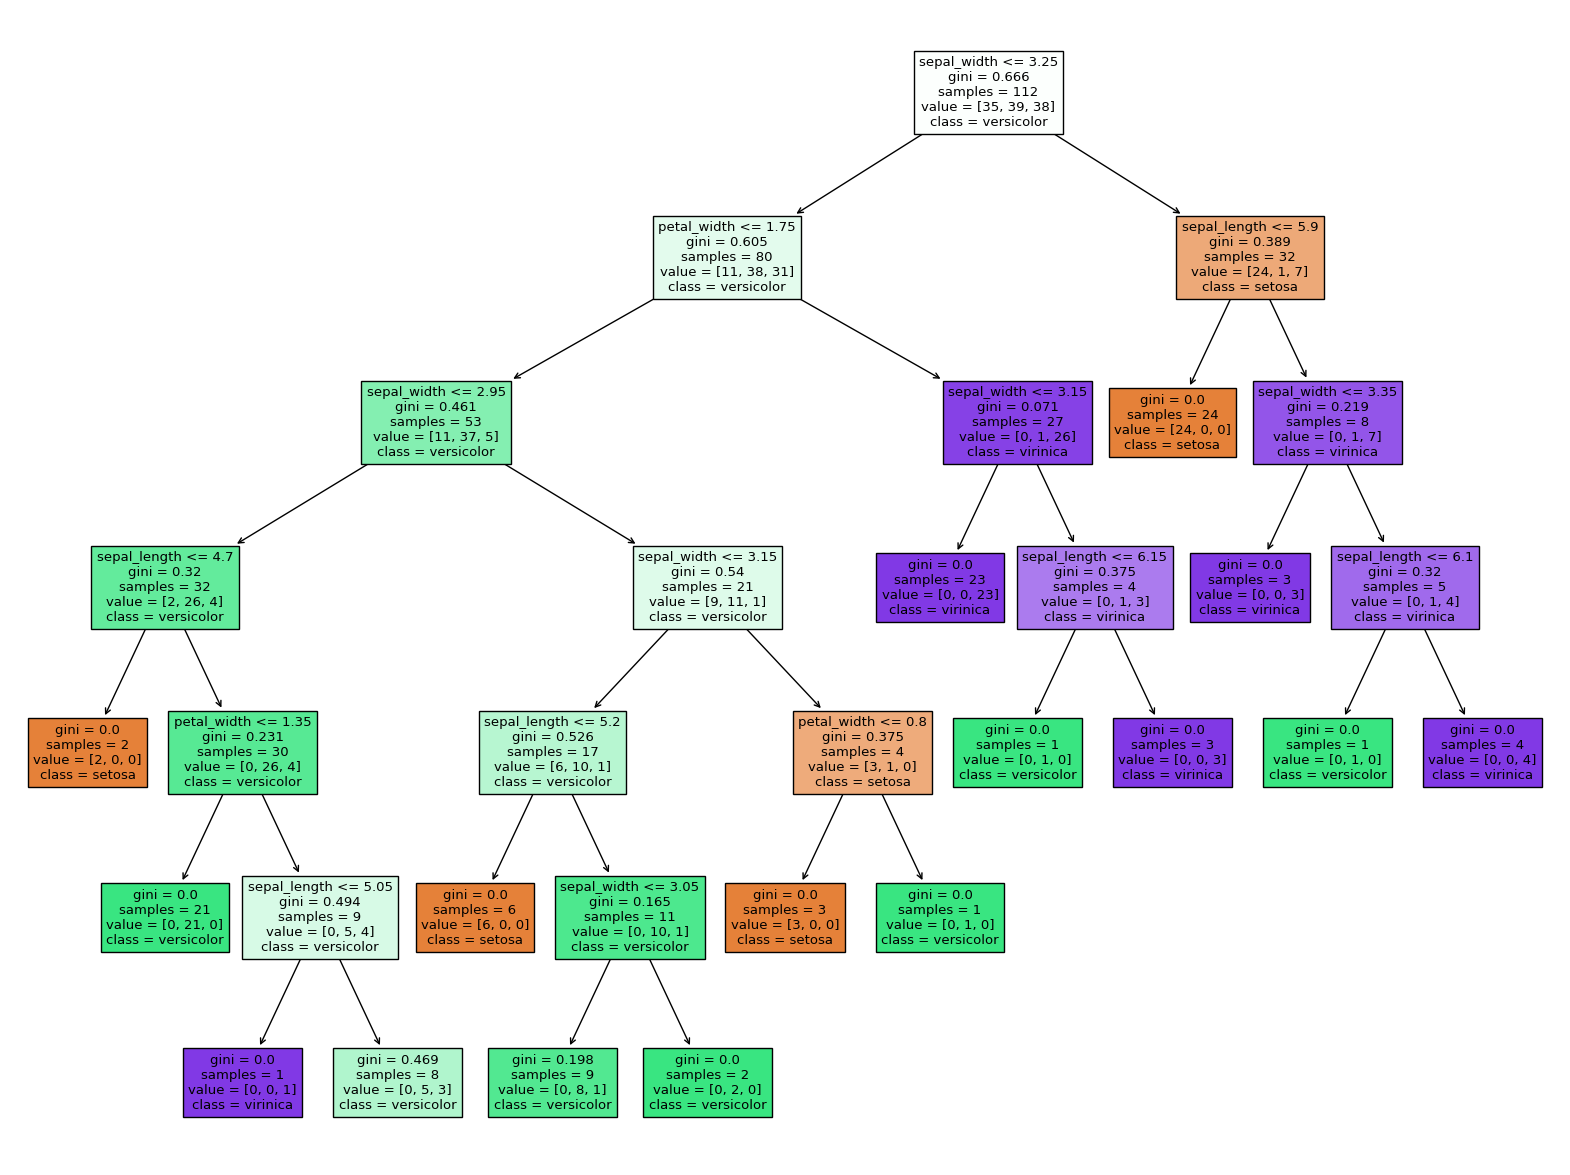

In [163]:
plt.figure(figsize=(20, 15))
tree2 = tree.plot_tree(dt_tuned, filled=True, feature_names=features, class_names=target)